In [66]:
import sys
import os

import matplotlib
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#%matplotlib notebook
# https://stackoverflow.com/questions/39007571/running-jupyter-with-multiple-python-and-ipython-paths
# https://coinsconf.com/cfp2022/

In [2]:
bag_name = "first_fly.bag"
bag_name1 = "second_fly.bag"


def get_csv(bag_name):
    
    data_dict = {}
    
    # Read bag
    b = bagreader(bag_name)
    
    for topic in b.topics: 
        data = b.message_by_topic(topic)
        data_dict['{}'.format(topic)] = pd.read_csv(data)
        
    return data_dict

In [3]:
exp = get_csv(bag_name); exp1 = get_csv(bag_name1)

[INFO]  Data folder first_fly already exists. Not creating.
[INFO]  Data folder second_fly already exists. Not creating.


# Open bags


Method for opening bags that are located in experiments folder. 


## Utils methods 

* `transform_dict_to_list` --> Transforms dictionary to list 
* `get_flight_duration_from_odom` --> Gets flight duration from odometry reading 



## Measured duration time difference between different control modalities


In this plot, we present duration difference as follows: 
 * $t_{\Delta} = t_h - t_{rc}$

## Smoothnes 

Interesting topic about curve smoothnes on stackexchange can be found [here](https://math.stackexchange.com/questions/1369155/how-do-i-rate-smoothness-of-discretely-sampled-data-picture).

More about using `scipy` for interpolation can be found [here](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html). 

More about cubic spline interpolation can be found [here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.03-Cubic-Spline-Interpolation.html). 

More about interpolation in scipy can be found [here](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html). 


In [ ]:
X = np.arange(0, len(h_energies), 1)
plt.figure()
plt.plot(X, h_energies, label="h")
plt.plot(X, r_energies, label="r")
plt.legend()



# Bar plot for evaluating human ratings using NASA TLX

NASA TLX is comprised of following elements: 
 1. Mental demand
 2. Physical demand
 3. Temporal demand
 4. Effort
 5. Frustration 
 6. Performance


In [54]:
def plot_bars(rc_raw, hpe_raw, rc_w, hpe_w, task="overall"): 
    
    #assert len(rc_raw) == len(hpe_raw) and len(hpe_w) == len(rc_w): 
    #    print("Please check lenght of inputs!")
    
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))    
    
    X = np.arange(len(rc_raw))
    
    ax[0].bar(X - 0.2, rc_raw, color="#7bc043", width=0.4)
    ax[0].bar(X + 0.2, hpe_raw, color="#fdf498", width=0.4)
    ax[0].grid(axis="y")
    ax[0].set_title("Raw {} ratings".format(task), fontsize=11.0)
    ax[0].set_xlabel("Participant ID", fontsize=10.0)
    ax[0].set_ylabel("Raw Rating", fontsize=10.0)
    ax[0].legend(labels=["RC", "HPE"])
    ax[0].set_xticks(max(X))

    ax[1].bar(X - 0.2, rc_w, color="#fe4a49", width=0.4)
    ax[1].bar(X + 0.2, hpe_w, color="#2ab7ca", width=0.4)
    ax[1].grid(axis="y")
    ax[1].set_title("Adjusted {} ratings".format(task), fontsize=11.0)
    ax[1].set_xlabel("Participant ID", fontsize=10.0)
    ax[1].set_ylabel("Adjusted Rating", fontsize=10.0)
    ax[1].legend(labels=["RC", "HPE"])
    ax[1].set_xticks(max(X)+1)

    fig.savefig("./{}/{}.svg".format(origin_dir, task))

# For everything will plot bar be used
def plot_bar(rc_raw, hpe_raw, origin_dir, task="overall",): 
    
    fig = plt.figure()
    
    X = np.arange(len(rc_raw))
    plt.bar(X - 0.2, rc_raw, color="#fe4a49", width=0.4)
    plt.bar(X + 0.2, hpe_raw, color="#2ab7ca", width=0.4)
    plt.grid(axis="y")
    plt.title("Raw {} ratings".format(task), fontsize=13.0)
    plt.xlabel("Participant ID", fontsize=13.0)
    plt.ylabel("Raw Rating", fontsize=13.0)
    plt.legend(labels=["RC", "HPE"])
    plt.xticks(range(max(X)+1))
    fig.savefig("./{}/{}.svg".format(origin_dir, task))

    

def plot_normalized_bars(rc_raw, hpe_raw, rc_w, hpe_w, task="overall"): 
    
    #assert len(rc_raw) == len(hpe_raw) and len(hpe_w) == len(rc_w): 
    #    print("Please check lenght of inputs!")
    
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))    
    
    X = np.arange(len(rc_raw))
    
    ax[0].bar(X - 0.2, rc_raw, color="#7bc043", width=0.4)
    ax[0].bar(X + 0.2, hpe_raw, color="#fdf498", width=0.4)
    ax[0].grid(axis="y")
    ax[0].set_title("Raw {} ratings".format(task), fontsize=12)
    ax[0].set_xlabel("Participant ID", fontsize=12.0)
    ax[0].set_ylabel("Raw Rating", fontsize=12.0)
    ax[0].set_xticks(range(max(X)+1))
    ax[0].legend(labels=["Normalized Raw Rating difference", "Normalized time difference"])

    ax[1].bar(X - 0.2, rc_w, color="#fe4a49", width=0.4)
    ax[1].bar(X + 0.2, hpe_w, color="#2ab7ca", width=0.4)
    ax[1].grid(axis="y")
    ax[1].set_title("Adjusted {} ratings".format(task), fontsize=12)
    ax[1].set_xlabel("Participant ID", fontsize=12.0)
    ax[1].set_ylabel("Adjusted Rating", fontsize=12.0)
    ax[1].set_xticks(range(max(X)+1))
    ax[1].legend(labels=["Normalized Adjusted Rating Difference", "Normalized time difference"])

    fig.savefig("./{}/{}.svg".format(origin_dir, task))

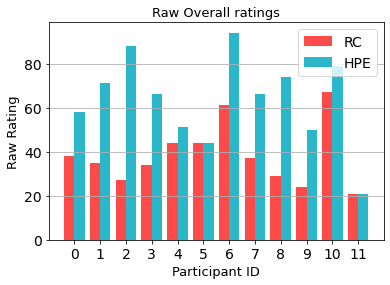

In [55]:
origin_dir = "hpe_paper"

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)


X = np.arange(15)

# Raw rating 

joy_rtlx1 = [44, 37, 21, 17, 19, 18]
ms_rtlx1  = []
hpe_rtlx1 = 


# Nice colors for plots can be found here: https://digitalsynopsis.com/design/beautiful-color-palettes-combinations-schemes/
# plot_bars(rc_raw_ratings, hpe_raw_ratings, rc_w_ratings, hpe_w_ratings, "Overall")
plot_bar(rc_raw_ratings, hpe_raw_ratings, origin_dir, "Overall")


#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

## NASA Overall score: 

- 9/10 participants found RC control has less task load than HPE control 
- 8/10 participants found RC control less task load heavy than HPE control when taking subjective importance of different task loads 

In [56]:
abs_td = [abs(i) for i in time_difference]
min_td = min(time_difference)
max_td = max(time_difference)
range_t = max_td - min_td

print(time_difference)

#plot_bar(time_difference, origin_dir, "Normalized Time Difference")

[-14.3, -73.69, -115.68, -21.36, -41.2, -48.65, -36.61, 26.89, -57.76, -102.89, 36.81, -60.5]


## Comparison of normalized time differences and NASA TLX differences

* Interesting pattern emerges, operators who percieved HPE control harder than RC control, performed better. 
* 7/10 participants were faster with HPE than with RC control 
* Could be interesting to see correlation between normalized rating difference with normalized time differences

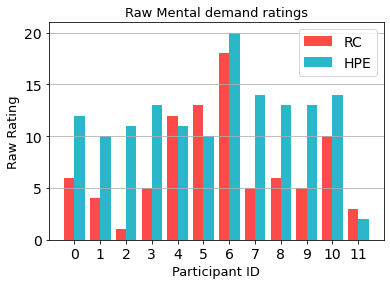

In [57]:
# Mental demand 
X = np.arange(1,12)
md_raw_rc  = [6, 4, 1, 5, 12, 13, 18, 5, 6, 5, 10, 3]
md_raw_hpe = [12, 10, 11, 13, 11, 10, 20, 14, 13, 13, 14, 2];

md_avg_rc = avg_list(md_raw_rc)
md_avg_hpe = avg_list(md_raw_hpe)


plot_bar(md_raw_rc, md_raw_hpe, origin_dir, "Mental demand")

## Mental demand

* 9/10 found HPE control to be more mentally demanding than RC control 
* 6/10 found HPE control to be more mentally demanding than RC control when using NASA adjusted TLX ratings 


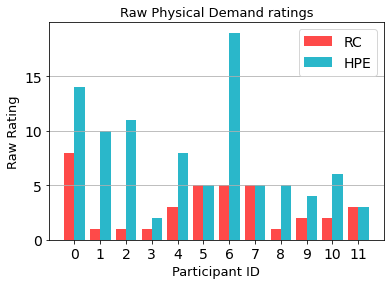

In [58]:
# Physical demand 
pd_raw_rc  = [8, 1, 1, 1, 3, 5, 5, 5, 1, 2, 2, 3]
pd_raw_hpe = [14, 10, 11, 2, 8, 5, 19, 5, 5, 4, 6, 3]
pd_avg_rc = avg_list(pd_raw_rc)
pd_avg_hpe = avg_list(pd_raw_hpe)

plot_bar(pd_raw_rc, pd_raw_hpe, origin_dir, "Physical Demand")

# Physical demand 

* It's clear that everyone found HPE control more phisically demanding than RC control 
* It's harder to move arms than fingers


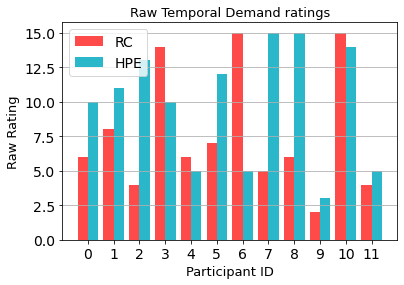

In [59]:
# Temporal Demand 

td_raw_rc  = [6, 8, 4, 14, 6, 7, 15, 5, 6, 2, 15, 4]; 
td_raw_hpe = [10, 11, 13 ,10, 5, 12, 5, 15, 15, 3, 14 ,5]; 

td_avg_rc = avg_list(td_raw_rc)
td_avg_hpe = avg_list(td_raw_hpe)


plot_bar(td_raw_rc, td_raw_hpe, origin_dir, "Temporal Demand")

# Temporal demand

There was no time pressure to finish maze in some amounted time. Nobody was given instructions to be as fast as he can, however, I've informed participants that we measure time neccessary to pass maze. 

Mixed results, some people felt more pressure when using RC some when using HPE. One of the reasons that may be the case is that when using HPE, you're more mentally and phisically challenged, therefore, less cognitive resources remain to associate with temporal demand. 

Results are mixed, and there is hard to reach clear conclusion just by examining these graphs regarding temporal demand. 

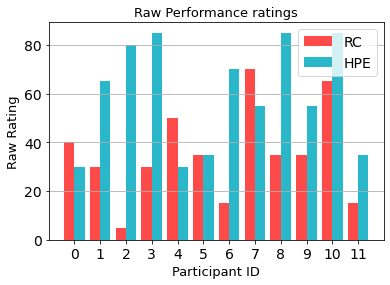

In [60]:
# Performance
# Scale is inverted (good - poor)

p_raw_rc  =  [8, 6, 1, 6, 10, 7, 3, 14, 7, 7, 13, 3]
p_raw_hpe = [6, 13, 16, 17, 6, 7, 14, 11, 17, 11, 17, 7]

p_avg_rc = avg_list(p_raw_rc)
p_avg_hpe = avg_list(p_raw_hpe)

p_adjusted_rc = [40,24,4,30,16,24,40,36,12,28 ]
p_adjusted_hpe = [18,52,0,72,0,51,24,51,28,21]

p_raw_rc  = [i * 5 for i in p_raw_rc]
p_raw_hpe = [i * 5 for i in p_raw_hpe]


plot_bar(p_raw_rc, p_raw_hpe, origin_dir, "Performance")

# Performance rating 

Performance rating scale. Most of the people felt that they performed better using RC control compared to HPE control. Performance scale is inverted (bad --> good) where higher score means better performance. More overall taskload -> better performance perception? 

### Raw ratings: 
 * 7/10 people thought they performed better with HPE compared to RC 
 * 1/10 though that performance was same with RC and HPE
 * 3/10 people found performance with RC control better 
 
### Adjusted ratings: 
 * 5/10 people think they performed better with HPE compared to RC 
 * 5/10 people think they performed better with RC than with HPE (however, overall HPE performance ratings are much higher than with RC) 
 

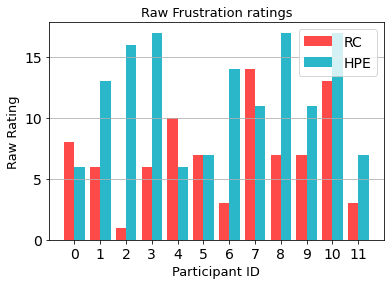

In [61]:
# Frustration 

f_raw_rc = [8, 6, 1, 6, 10, 7, 3, 14, 7, 7, 13, 3]
f_raw_hpe = [6, 13, 16, 17, 6, 7, 14, 11, 17, 11, 17, 7]

f_avg_rc = avg_list(f_raw_rc)
f_avg_hpe = avg_list(f_raw_hpe)


plot_bar(f_raw_rc, f_raw_hpe, origin_dir, "Frustration")

# Frustration 

* 9/10 People found HPE control more frustrating than RC control 

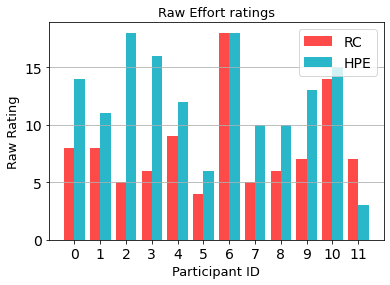

In [62]:
# Effort --> Check data for effort! 


effort_raw_rc  = [8,8,5,6,9,4,18,5,6,7,14,7]
effort_raw_hpe = [14, 11, 18, 16, 12, 6, 18, 10, 10, 13, 15, 3]

effort_avg_rc = avg_list(effort_raw_rc)
effort_avg_hpe = avg_list(effort_raw_hpe)

plot_bar(effort_raw_rc, effort_raw_hpe, origin_dir, "Effort")

# Effort

* 9/10 percieved that there's more effort neccessary for HPE control than for RC control 

## Plot plots on subplots :) 

Plot RAW and Adjusted NASA TLX on 2x1 plots to fit them in paper better. 


### TODO: 

- [x] Refactor the code 
- [x] Add methods for time cropping (when conditions satisfied) 
- [ ] Find a way to evaluate linear relationship between NASA TLX and time neccessary for passing labyrinth 
- [ ] Add it into paper 
- [x] Add start time into calculation and take in consideration only end time regarding conditions

# Algorithm dev

### Test zone definiton 

This part contains small code snippet for zone definition on image plane 

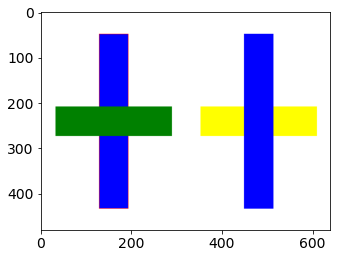

In [63]:
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import numpy as np


def define_zones(img_width, img_height, edge_offset, rect_width):
        
        # img center
        cx, cy = img_width/2, img_height/2
        # 1st zone
        cx1, cy1 = cx/2, cy/2
        # 2nd zone
        cx2, cy2 = cx + cx1, cy + cy1
        
        # Define offsets from edge
        if edge_offset < 1: 
            height_edge = edge_offset * img_height
            width_edge = edge_offset/2 * img_width

        # Zone definition 
        if rect_width < 1: 
            r_width = rect_width * img_width

        height_rect = ((cx1 - r_width, height_edge), (cx1 + r_width, img_height - height_edge))
        yaw_rect = ((width_edge, cy - r_width), (cx - width_edge, cy + r_width))
        pitch_rect = ((cx2 - r_width, height_edge), (cx2 + r_width, img_height - height_edge))
        roll_rect = ((cx + width_edge, cy-r_width), (img_width - width_edge), (cy + r_width))
        
        return height_rect, yaw_rect, pitch_rect, roll_rect

img_height = 480
img_width = 640
img = Image.new('RGB', (img_width, img_height), color = 'white')

height_rect, yaw_rect, pitch_rect, roll_rect = define_zones(img_width, img_height, 0.1, 0.05)

img1 = ImageDraw.Draw(img)  
img1.rectangle(height_rect, fill ="blue", outline ="red")
img1.rectangle(yaw_rect, fill="green")
img1.rectangle(roll_rect, fill="yellow")
img1.rectangle(pitch_rect, fill="blue")
imshow(np.asarray(img))

Awesome plotting materials can be found here: 

* https://jingwen-z.github.io/data-viz-with-matplotlib-series8-radar-chart/ 
* https://www.scribbr.com/statistics/statistical-tests/ 



['PD', 'TD', 'MD', 'F', 'E', 'P']
[7.666666666666667, 9.833333333333334, 11.916666666666666, 11.833333333333334, 12.166666666666666, 11.833333333333334, 7.666666666666667]
[3.0833333333333335, 7.666666666666667, 7.333333333333333, 7.083333333333333, 8.083333333333334, 7.083333333333333, 3.0833333333333335]


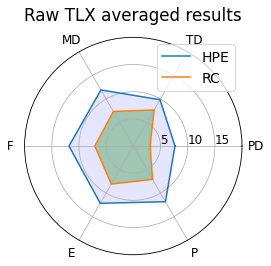

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B'],
'PD': [pd_avg_hpe, pd_avg_rc],
'TD': [td_avg_hpe, td_avg_rc],
'MD': [md_avg_hpe, md_avg_rc],
'F': [f_avg_hpe, f_avg_rc],
'E': [effort_avg_hpe, effort_avg_rc],
'P': [p_avg_hpe, p_avg_rc]
})

 
# number of variable
categories=list(df)[1:]
print(categories)
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values0=df.loc[0].drop('group').values.flatten().tolist()
values0 += values0[:1]
values0
print(values0)

values1 = df.loc[1].drop('group').values.flatten().tolist()
values1 += values1[:1]
values1
print(values1)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([5, 10, 15, 20], ["5","10", "15"], color="black", size=12)
plt.ylim(0, 20)
 
# Plot data
ax.plot(angles, values0, linewidth=1.5, linestyle='solid', label="HPE")
ax.fill(angles, values0, 'b', alpha=0.1)

ax.plot(angles, values1, linewidth=1.5, linestyle='solid', label="RC")
ax.fill(angles, values1, 'g', alpha=0.3)

# Show the graph
plt.legend(loc="best")
plt.title("Raw TLX averaged results")
plt.savefig("{}/sst_plt.svg".format(origin_dir))
plt.show()


In [78]:
def avg_list(list_):
    
    return sum(list_)/len(list_)

In [3]:
import pandas as pd
def parse_csv_to_dict(csv_path): 
    
    df = pd.read_csv(csv_path)
    
    return df

In [127]:
df_ = parse_csv_to_dict("./tlx.csv")

In [25]:
user_ids = set(df_["User ID"])
ctl_modalities = set(df_["Control modality"])
task = set(df_['Task.1'])

print(ctl_modalities)

{'Joystick control', 'Master-slave control', 'Human pose estimation control'}


In [51]:
dict_ = df_.to_dict()
print(df_)

             Timestamp            Email Address  User ID  \
0   2/21/2023 10:18:27  alexviena2011@gmail.com        1   
1   2/21/2023 10:23:17  alexviena2011@gmail.com        1   
2   2/21/2023 10:28:09  alexviena2011@gmail.com        1   
3   2/21/2023 10:36:22  alexviena2011@gmail.com        1   
4   2/21/2023 10:41:49  alexviena2011@gmail.com        1   
5   2/21/2023 10:47:39  alexviena2011@gmail.com        1   
6   2/21/2023 11:05:34          DUMMY@gmail.com        2   
7   2/21/2023 11:09:03          DUMMY@gmail.com        2   
8   2/21/2023 11:16:14          DUMMY@gmail.com        2   
9   2/21/2023 11:20:45          DUMMY@gmail.com        2   
10  2/21/2023 11:25:49          dummy@gmail.com        2   
11  2/21/2023 11:31:05          dummy@gmail.com        2   
12  2/21/2023 11:52:31    losilla.7@hotmail.com        3   
13  2/21/2023 11:56:54    losilla.7@hotmail.com        3   
14  2/21/2023 11:57:58     losilla.@hotmail.com        3   
15  2/21/2023 12:00:28    losilla.7@hotm

In [128]:
joy_rtlx1, joy_rtlx2 = [], []
joy_rtlx1_md, joy_rtlx2_md = [], []
joy_rtlx1_pd, joy_rtlx2_pd = [], []
joy_rtlx1_td, joy_rtlx2_td = [], []
joy_rtlx1_e, joy_rtlx2_e = [], []
joy_rtlx1_f, joy_rtlx2_f = [], []
joy_rtlx1_p, joy_rtlx2_p = [], []

ms_rtlx1, ms_rtlx2 = [], []
ms_rtlx1_md, ms_rtlx2_md = [], []
ms_rtlx1_pd, ms_rtlx2_pd = [], []
ms_rtlx1_td, ms_rtlx2_td = [], []
ms_rtlx1_e, ms_rtlx2_e = [], []
ms_rtlx1_f, ms_rtlx2_f = [], []
ms_rtlx1_p, ms_rtlx2_p = [], []



hpc_rtlx1, hpc_rtlx2 = [], []
hpc_rtlx1_md, hpc_rtlx2_md = [], []
hpc_rtlx1_pd, hpc_rtlx2_pd = [], []
hpc_rtlx1_td, hpc_rtlx2_td = [], []
hpc_rtlx1_e, hpc_rtlx2_e = [], []
hpc_rtlx1_f, hpc_rtlx2_f = [], []
hpc_rtlx1_p, hpc_rtlx2_p = [], []


for index, row in df_.iterrows():
    if row["Task.1"] == 1:
        if row['Control modality'] == "Joystick control": 
            joy_rtlx1.append(row['Sum'])
            joy_rtlx1_md.append(row['Mental demand '])
            joy_rtlx1_pd.append(row['Physical demand'])
            joy_rtlx1_td.append(row['Temporal demand'])
            joy_rtlx1_p.append(row['Performance'])
            joy_rtlx1_e.append(row['Effort'])
            joy_rtlx1_f.append(row['Frustration'])
        if row['Control modality'] == "Master-slave control":
            ms_rtlx1.append(row['Sum'])
            ms_rtlx1_md.append(row['Mental demand '])
            ms_rtlx1_pd.append(row['Physical demand'])
            ms_rtlx1_td.append(row['Temporal demand'])
            ms_rtlx1_p.append(row['Performance'])
            ms_rtlx1_e.append(row['Effort'])
            ms_rtlx1_f.append(row['Frustration'])
        if row['Control modality'] == 'Human pose estimation control': 
            hpc_rtlx1.append(row['Sum'])
            hpc_rtlx1_md.append(row['Mental demand '])
            hpc_rtlx1_pd.append(row['Physical demand'])
            hpc_rtlx1_td.append(row['Temporal demand'])
            hpc_rtlx1_p.append(row['Performance'])
            hpc_rtlx1_e.append(row['Effort'])
            hpc_rtlx1_f.append(row['Frustration'])
    if row["Task.1"] == 2:
        if row['Control modality'] == "Joystick control": 
            joy_rtlx2.append(row['Sum'])
            joy_rtlx2_md.append(row['Mental demand '])
            joy_rtlx2_pd.append(row['Physical demand'])
            joy_rtlx2_td.append(row['Temporal demand'])
            joy_rtlx2_p.append(row['Performance'])
            joy_rtlx2_e.append(row['Effort'])
            joy_rtlx2_f.append(row['Frustration'])
        if row['Control modality'] == "Master-slave control":
            ms_rtlx2.append(row['Sum'])
            ms_rtlx2_md.append(row['Mental demand '])
            ms_rtlx2_pd.append(row['Physical demand'])
            ms_rtlx2_td.append(row['Temporal demand'])
            ms_rtlx2_p.append(row['Performance'])
            ms_rtlx2_e.append(row['Effort'])
            ms_rtlx2_f.append(row['Frustration'])
        if row['Control modality'] == 'Human pose estimation control': 
            hpc_rtlx2.append(row['Sum'])
            hpc_rtlx2_md.append(row['Mental demand '])
            hpc_rtlx2_pd.append(row['Physical demand'])
            hpc_rtlx2_td.append(row['Temporal demand'])
            hpc_rtlx2_p.append(row['Performance'])
            hpc_rtlx2_e.append(row['Effort'])
            hpc_rtlx2_f.append(row['Frustration'])


    

In [61]:
print(joy_rtlx1)
print(joy_rtlx2)
print(hpc_rtlx1)
print(hpc_rtlx2)

[44, 37, 21, 17, 19, 18]
[46, 26, 26, 16, 24, 14]
[23, 18, 32, 17, 35, 33]
[39, 17, 32, 16, 22, 20]


In [191]:
# For everything will plot bar be used
def plot_bar(joy, ms, hpc, origin_dir, task="overall",): 
    
    fig = plt.figure()
    
    X = np.arange(len(joy))
    plt.bar(X - 0.3, joy, color="b", width=0.2)
    plt.bar(X, ms, color="g", width=0.2)
    plt.bar(X + 0.3, hpc, color="r", width=0.2)
    plt.grid(axis="y")
    plt.title("Raw {} ratings".format(task), fontsize=13.0)
    plt.xlabel("Participant ID", fontsize=13.0)
    plt.ylabel("Raw Rating", fontsize=13.0)
    plt.legend(labels=["Joy", "MSlave", "Hpc"])
    plt.xticks(range(max(X)+1))
    fig.savefig("./{}/{}.svg".format(origin_dir, task))

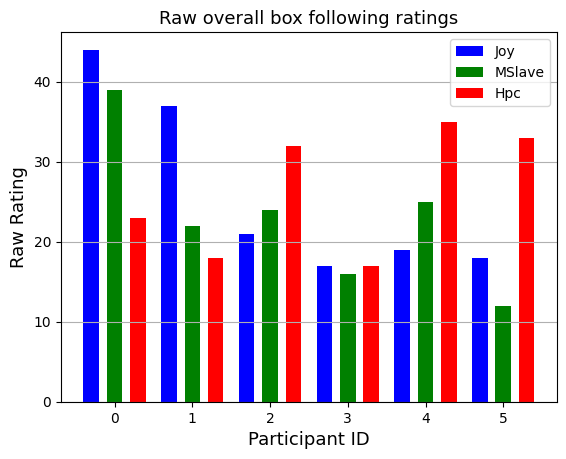

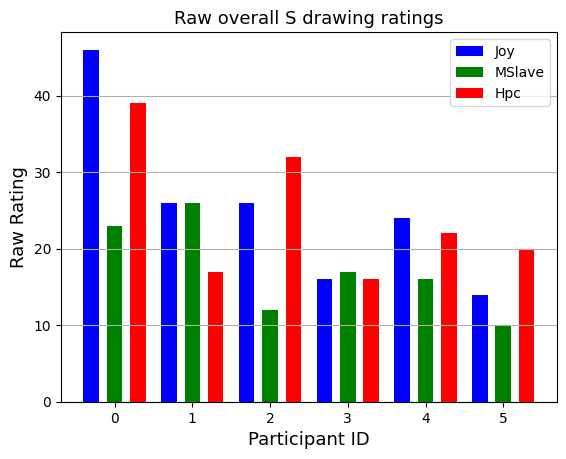

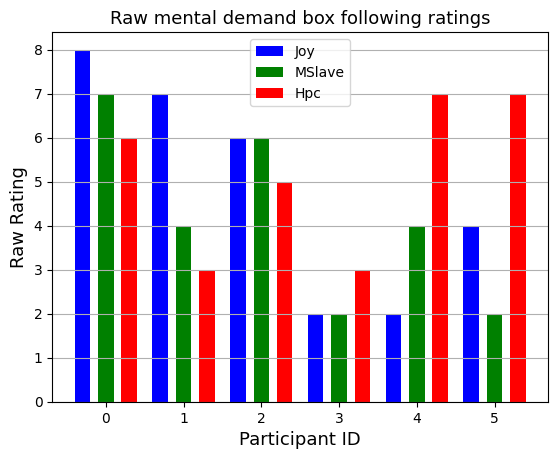

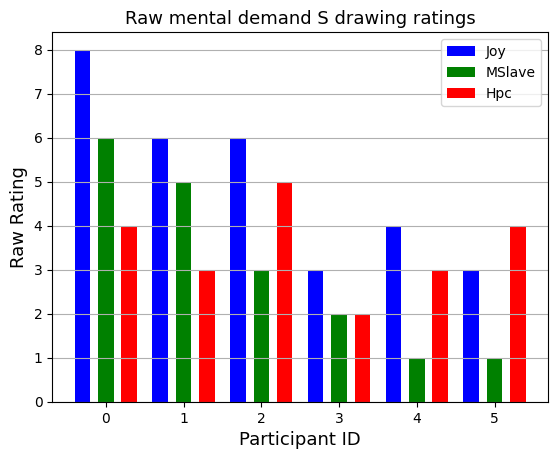

In [193]:
plot_bar(joy_rtlx1, ms_rtlx1, hpc_rtlx1, "./licas", task="overall box following")
plot_bar(joy_rtlx2, ms_rtlx2, hpc_rtlx2, "./licas", task="overall S drawing")



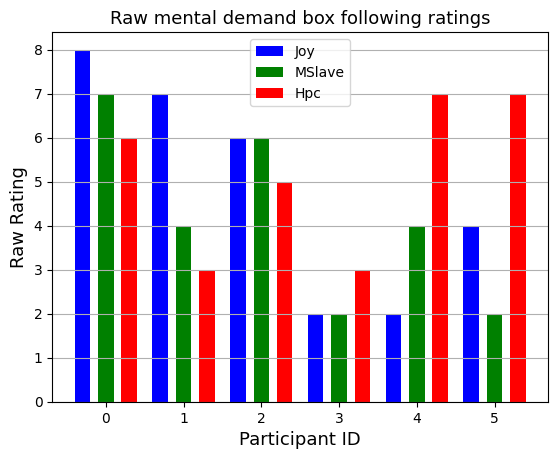

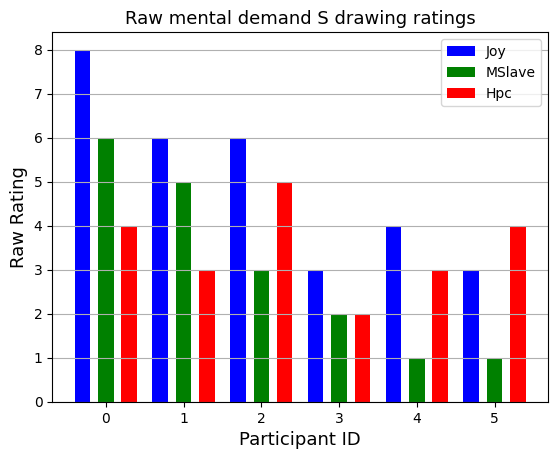

In [194]:
plot_bar(joy_rtlx1_md, ms_rtlx1_md, hpc_rtlx1_md, "./licas", task="mental demand box following")
plot_bar(joy_rtlx2_md, ms_rtlx2_md, hpc_rtlx2_md, "./licas", task="mental demand S drawing")

['PD', 'TD', 'MD', 'F', 'E', 'P']
[<Axes: > <Axes: >]


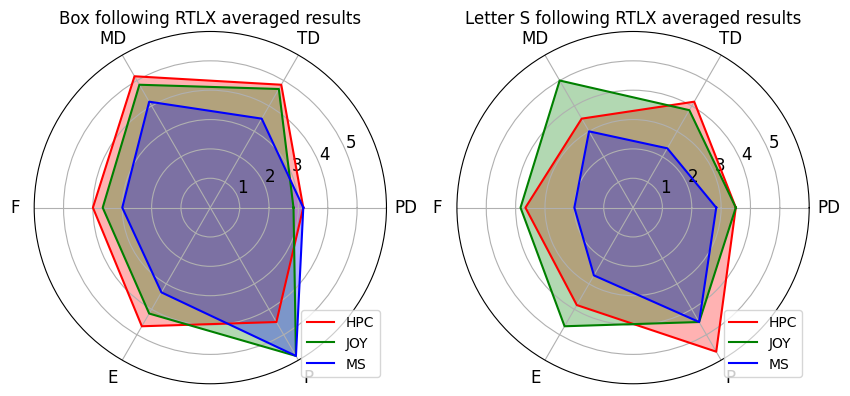

In [195]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

origin_dir = "./licas"
 
# Set data
df = pd.DataFrame({
'group': ['A','B', 'C'],
'PD': [pd_hpc_tlx1_avg, pd_joy_tlx1_avg, pd_ms_tlx1_avg],
'TD': [td_hpc_tlx1_avg, td_joy_tlx1_avg, td_ms_tlx1_avg],
'MD': [md_hpc_tlx1_avg, md_joy_tlx1_avg, md_ms_tlx1_avg],
'F': [f_hpc_tlx1_avg, f_joy_tlx1_avg, f_ms_tlx1_avg],
'E': [e_hpc_tlx1_avg, e_joy_tlx1_avg, e_ms_tlx1_avg],
'P': [p_hpc_tlx1_avg, p_joy_tlx1_avg, p_ms_tlx1_avg]
})

df1 = pd.DataFrame({
'group': ['A','B', 'C'],
'PD': [pd_hpc_tlx2_avg, pd_joy_tlx2_avg, pd_ms_tlx2_avg],
'TD': [td_hpc_tlx2_avg, td_joy_tlx2_avg, td_ms_tlx2_avg],
'MD': [md_hpc_tlx2_avg, md_joy_tlx2_avg, md_ms_tlx2_avg],
'F': [f_hpc_tlx2_avg, f_joy_tlx2_avg, f_ms_tlx2_avg],
'E': [e_hpc_tlx2_avg, e_joy_tlx2_avg, e_ms_tlx2_avg],
'P': [p_hpc_tlx2_avg, p_joy_tlx2_avg, p_ms_tlx2_avg]
})

 
# number of variable
categories=list(df)[1:]
print(categories)
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values10 = df.loc[0].drop('group').values.flatten().tolist()
values10 += values10[:1]
values10

values11 = df.loc[1].drop('group').values.flatten().tolist()
values11 += values11[:1]
values11

values12 = df.loc[2].drop('group').values.flatten().tolist()
values12 += values12[:1]
values12

values20 = df1.loc[0].drop('group').values.flatten().tolist()
values20 += values20[:1]
values20

values21 = df1.loc[1].drop('group').values.flatten().tolist()
values21 += values21[:1]
values21

values22 = df1.loc[2].drop('group').values.flatten().tolist()
values22 += values22[:1]
values22


 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(121, projection='polar')
ax2 = plt.subplot(122, projection='polar')


print(axs)
 
# Draw one axe per variable + add labels
ax1.set_xticks(angles[:-1], categories, color='black', size=12)
# Draw ylabels
#axs[0].set_rlabel_position(0)
ax1.set_yticks([1, 2, 3, 4, 5], ["1","2", "3", "4", "5"], color="black", size=12)
ax1.set_ylim(0, 6)
# Plot data
ax1.plot(angles, values10, 'r', linewidth=1.5, linestyle='solid', label="HPC")
ax1.fill(angles, values10, 'r', alpha=0.3)
ax1.plot(angles, values11, 'g', linewidth=1.5, linestyle='solid', label="JOY")
ax1.fill(angles, values11, 'g', alpha=0.3)
ax1.plot(angles, values12, 'b' , linewidth=1.5, linestyle='solid', label="MS")
ax1.fill(angles, values12, 'b', alpha=0.3)

ax2.set_xticks(angles[:-1], categories, color="black", size=12)
ax2.set_yticks([1, 2, 3, 4, 5], ["1","2", "3", "4", "5"], color="black", size=12)
ax2.set_ylim(0, 6)
# Plot data
ax2.plot(angles, values20, 'r', linewidth=1.5, linestyle='solid', label="HPC")
ax2.fill(angles, values20, 'r', alpha=0.3)
ax2.plot(angles, values21, 'g', linewidth=1.5, linestyle='solid', label="JOY")
ax2.fill(angles, values21, 'g', alpha=0.3)
ax2.plot(angles, values22, 'b', linewidth=1.5, linestyle='solid', label="MS")
ax2.fill(angles, values22, 'b', alpha=0.3)

# Show the graph
ax1.legend(loc="lower right")
ax2.legend(loc="lower right")
ax1.set_title("Box following RTLX averaged results")
ax2.set_title("Letter S following RTLX averaged results")
#fig.suptitle("Averaged raw TLX comparison over tasks")
plt.savefig("{}/rtlx_comparison.svg".format(origin_dir))
plt.show()



## Get spider graphs

In [125]:
## AVGS
## HPC
pd_hpc_tlx1_avg = avg_list(hpc_rtlx1_pd); pd_hpc_tlx2_avg = avg_list(hpc_rtlx2_pd)
td_hpc_tlx1_avg = avg_list(hpc_rtlx1_td); td_hpc_tlx2_avg = avg_list(hpc_rtlx2_td)
md_hpc_tlx1_avg = avg_list(hpc_rtlx1_md); md_hpc_tlx2_avg = avg_list(hpc_rtlx2_md)
e_hpc_tlx1_avg = avg_list(hpc_rtlx1_e); e_hpc_tlx2_avg = avg_list(hpc_rtlx2_e)
f_hpc_tlx1_avg = avg_list(hpc_rtlx1_f); f_hpc_tlx2_avg = avg_list(hpc_rtlx2_f)
p_hpc_tlx1_avg = avg_list(hpc_rtlx1_p); p_hpc_tlx2_avg = avg_list(hpc_rtlx2_p)
## JOY
pd_joy_tlx1_avg = avg_list(joy_rtlx1_pd); pd_joy_tlx2_avg = avg_list(joy_rtlx2_pd)
td_joy_tlx1_avg = avg_list(joy_rtlx1_td); td_joy_tlx2_avg = avg_list(joy_rtlx2_td)
md_joy_tlx1_avg = avg_list(joy_rtlx1_md); md_joy_tlx2_avg = avg_list(joy_rtlx2_md)
e_joy_tlx1_avg = avg_list(joy_rtlx1_e); e_joy_tlx2_avg = avg_list(joy_rtlx2_e)
f_joy_tlx1_avg = avg_list(joy_rtlx1_f); f_joy_tlx2_avg = avg_list(joy_rtlx2_f)
p_joy_tlx1_avg = avg_list(joy_rtlx1_p); p_joy_tlx2_avg = avg_list(joy_rtlx2_p)
## MS
pd_ms_tlx1_avg = avg_list(ms_rtlx1_pd); pd_ms_tlx2_avg = avg_list(ms_rtlx2_pd)
td_ms_tlx1_avg = avg_list(ms_rtlx1_td); td_ms_tlx2_avg = avg_list(ms_rtlx2_td)
md_ms_tlx1_avg = avg_list(ms_rtlx1_md); md_ms_tlx2_avg = avg_list(ms_rtlx2_md)
e_ms_tlx1_avg = avg_list(ms_rtlx1_e); e_ms_tlx2_avg = avg_list(ms_rtlx2_e)
f_ms_tlx1_avg = avg_list(ms_rtlx1_f); f_ms_tlx2_avg = avg_list(ms_rtlx2_f)
p_ms_tlx1_avg = avg_list(ms_rtlx1_p); p_ms_tlx2_avg = avg_list(ms_rtlx2_p)

In [119]:
import numpy as np
import pylab as pl

class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

        self.n = len(titles)
        self.angles = np.arange(90, 90+360, 360.0/self.n)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 6), angle=angle, labels=label)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 5)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)


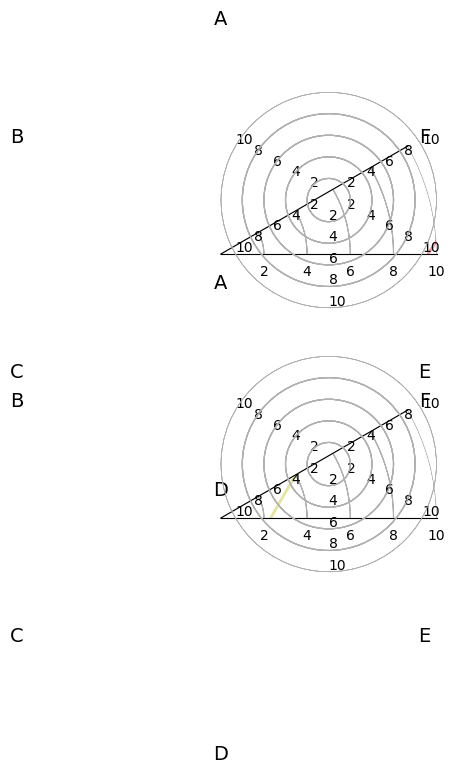

In [121]:
titles = ['A','B','C','D','E','F']
parameters_list = ['2','4','6','8','10']

fig = plt.figure()
labels = [parameters_list, parameters_list, parameters_list,parameters_list,parameters_list,parameters_list]

radar = Radar(fig, titles, labels, rect=[0.0, 0.55, 0.5, 0.45])
radar.plot([1, 3, 2, 5, 4, 9],  "-", lw=2, color="r", alpha=0.4, label="first")

radar = Radar(fig, titles, labels, rect=[0.0, 0.0, 0.5, 0.45])
radar.plot([3, 6, 4, 1, 1, 2],  "-", lw=2, color="y", alpha=0.4, label="second")